# EF d'Hermitte en Non-linéaire géométrique - détermination des charges et modes de flambage linéarisés

**Formulation et mise en oeuvre d'éléments finis de poutres à interpolations d'Hermitte en flexion et linéaire en tension**

***S. Drapier, Novembre 2024***

Cette partie décrit la cinématique en **rotations modérées** puis la forme algébrique à résoudre, un calcul aux **valeurs propres**, qui découle de la **linéarisation du problème de flambage**. La démarche est d'abord posée pour un cas **simpliste** d'une poutre soumise à un effort normal de compression. Le problème étant **non-linéaire**, il est ensuite écrit de façon incrémentale afin de faire apparaître l'effet de l'état de contraintes internes sur l'apparition du flambage. Cette écriture du **problème tangent** qui caractérise l'**équilibre incrémental** est précisée dans le cas des EF de poutre.  La construction de la **rigidité géométrique**, en prenant en compte le **pré-chargement** sur la structure, est ensuite détaillée, avec une attention particulière sur le passage de la formulation du **repère de la poutre vers le repère de structure**. 

On se réfère ici aux détails donnés dans l'introduction et au Chapitre 4 (et Chapitre 6) de https://www.emse.fr/~drapier/index_fichiers/CoursPDF/Meca-Structu2A/SDrapier_Meca-struct-num_2024.pdf. **Cette présentation est grandement simplifiée du flambage par rapport à une présentation plus générale qui peut en être faite.** 


$$
\def\vec#1{\overrightarrow{#1}} 
\def\dint{\displaystyle \int}%
\def\dsum{\displaystyle \sum}%
\def\dsqrt{\displaystyle \sqrt}%
\def\df#1#2{{\dfrac{d #1}{d #2}}}
\def\tens#1{\underline{\underline{#1}}}
\def\vect#1{\left\{\mathbf{#1}\right\}}
\def\mat#1{\left[\mathbf{#1}\right]}
\def\vecd#1#2{\begin{Bmatrix} #1 \\ #2 \end{Bmatrix}}
$$


## Cinématique de Bernoulli en rotations modérées
On montre que l'hypothèse des rotations modérées ($v'(x)< 10°$) permet de prendre en compte l'apparition du flambage dans nos poutres, *i.e.* de représenter l'état déformé lorsque la flexion se produit. Pour cela, l'expression de la déformation normale est modifiée, elle incorpore l'effet de la flèche $v(x)$ sur cette déformation de membrane qui s'écrit désormais :
$$	\begin{array}{l}
%	\tens{\gamma}(\vect{u})= %	\dfrac{1}{2}(\tens{\nabla}\vect{u}+\tens{\nabla}^t\vect{u})+ \dfrac{1}{2}\tens{\nabla}\vect{u}\cdot\tens{\nabla}^t\vect{u} = \tens{\epsilon}(\vect{u})+\tens{\mu}(\vect{u})
	\tens{\gamma}(\vec u)= \dfrac{1}{2}(\tens \nabla \vec{u}+\tens \nabla^T\vec{u})+ \dfrac{1}{2}\tens \nabla^T \vec{u}\cdot\tens \nabla \vec{u} = 		\tens{\epsilon}(\vec{u})+\tens{\mu}(\vec{u})
	\\[1em]
	\text{Poutre }\leadsto \left\{ \begin{array}{rccccl}
		\gamma_{x}(u',v',v'') &=& \gamma^m_{x}(u',v') &- &y \; \kappa_z(x) \\[.8em]
		&=& e_x(u') +  \mu_{x}(v') &- & y \; \kappa_z(x) \\[.8em]
		&=& u' +\dfrac{1}{2}{v^{'2}} &- &y \; v''(x)
	\end{array} \right.
\end{array}$$
Les contraintes généralisées n'ont pas changé, ce qui nous permet d'écrire directement la forme intégrale faible 
$$
 \dint_{0}^{l} \left(N(x) \left( \delta u' + v'\delta v' \right) + M(x) \delta v^{''}\right)dx - [N(x)\delta u(x)]_0^l = 0, \:\:\forall (\delta u, \delta v) \:C.A.(0) \\
$$

## Première formulation - cas 1D en compression
Pour le cas basique d'une poutre droite bloquée à son origine et soumise à un effort de compression $N(l)=-F$, on obtient directement l'expression de l'effort normal à l'intérieur de la poutre, tel que $\frac{dN(x)}{dx}=0 \Rightarrow N(x)=-F$. Ceci correspond à l'hypothèse de flambage à contrainte constante valable dans les structures élancées et pour la déformée correspondant à l'apparition de l'instabilité. On aboutit à la forme qu'on peut discrétiser et où apparaît la rigidité "initiale" déjà introduite pour le cas linéaire (<a href="#eq2.1">Eq. 2.1,</a>, <a href="#eq2.2">Eq. 2.2</a>, <a href="#eq2.3">Eq. 2.3</a>) mais aussi un nouveau terme appelé **rigidité géométrique** ou **matrice des pré-contraintes**:
$$\begin{equation}
    \begin{array}{l}
		-\delta \mathcal{P}_{int}(\delta u(x)) + \delta \mathcal{P}_{ext}(\delta u(x))
		=0, \forall \delta u(x)\:C.A.(0)  \\ \xrightarrow{\text{élémentaire}}
 \underbrace{\dint_{x_1}^{x_2} \left\{ N^h(x)\:\delta u'^h(x) + M^h(x)\:\delta v''^h(x)\right\} dx^h} - F \underbrace{\dint_{x_1}^{x_2} v'(x) \: \delta v'(x) dx^h} \\[0.8em]
 \Leftrightarrow \hspace{12em} \mat{K^e_0} \hspace{5em}- \hspace{5em} F \mat{K_{\sigma}^e}
    \end{array} \tag{4.1}
\end{equation}$$


### Expression de la rigidité géométrique
Comme nous l'avons fait pour la rigidité initiale et pour la matrice de masse, la rigidité géométrique s'obtient facilemet à partir de l'expression discrétisée de la puissance virtuelle associée. 
$$\begin{array}{l}
	\dint_{x_1}^{x_2} {v'^h(x)\delta u'^h(x)} \:dx^h   \xrightarrow{v^{h,e}(x)=\dsum_{i=1}^4 \mathcal N_i(x)\ q^e_{i,f}} 
		K_{\sigma,ij} =  \dint_{x_1}^{x_2} \dfrac{d\mathcal{N}_i}{dx} \dfrac{d\mathcal{N}_j}{dx} \:dx^h  
	\end{array} 	$$

Tous calculs faits, ces expressions ont la forme suivante dans le repère local de la poutre :
$$\mat{K^e_\sigma}_{(l)}= \dfrac{1}{30 \ l_e}\begin{bmatrix}
			36 & 3l_e & -36 & 3l_e \\
			& 4l_e^2 & -3l_e & -l_e^2 \\
			&  & 36 & -3l_e \\
			&  &  &  4l_e^2
		\end{bmatrix} $$

et dans le repère global après le changement de repère habituel $\mat{K^e_\sigma}_{(g)}=\mat{R} \mat{K^e_\sigma}_{(l)}  \mat{R}^T$
$$
\mat{K^e\sigma}_{(g)} = \dfrac{1}{30 \ _e} \left[ 
\begin{array}{cccccc|c}
    u_1^1 & u_2^1 & \theta^1 & u_1^2 & u_2^2 & \theta^2 &\\
    \hline \\
    36 S^{2} & - 36S & -3 S l_e & -36 S^{2} & 36 CS & -3 S l_e & u_1^1 \\[0.5em]
     & 36 C^{2} & 3 C l_e & 36C S & -36 C^{2} & 3 C l_e & u_2^1 \\[0.5em]
     &  & 4 l_e^{2} & 3 S l_e & -3 C l_e & - l_e^{2} & \theta^1 \\[0.5em]
     &  &  & 36 S^{2} & -36C S & 3 S l_e & u_1^2 \\[0.5em]
     &  &  &  & 36 C^{2} & -3 C l_e & u_2^2 \\[0.5em]
     &  &  &  &  & 4 l_e^{2} & \theta^2 \\[0.5em]
\end{array} \right] \tag{4.2}
$$
### Calcul des charges de flambage dans le cas 1D
Les charges de flambage et les modes associés sont obtenus par un calcul aux valeurs propres, identique à celui utilisé pour les [vibrations libres](EF_Hermitte_Vibrations.ipynb). Les valeurs propres seront les charges critiques, car ici l'effort terminal imposé $-F \vec{x}$ joue le rôle de ces valeurs propres :
$$
	det \left( \mat{K_0}-F_i\mat{K_\sigma}\right)=0
$$

On verra ci-dessous que dans un cas plus général, le pré-chargement peut être (beaucoup) plus complexe : ce sont les efforts normaux qui règnent dans l'ensemble des et qui doivent être évalués par la résolution préalable du problème linéaire.

## Formulation du problème tangent
Pour formuler le problème de flambage plus général, il faut revenir à la signification de la non-linéarité géométrique, et pour cela une écriture incrémental du PPV peut être explicitée.


### Formulation incrémentale dans le cas des poutres
La relation <a href="#eq4.1">Eq. 4.1</a> a permis de poser le problème simplifié de calcul des valeurs propres. Pour le généraliser à des chargements plus complexes - après tout, c'est bien le chargement normal qui induit le flambage, mais ce chargement local peut résulter d'un chargement complexe à l'échelle de la structure, voire même un chargement simple mais hors de la direction de la poutre considérée. 

L'écriture incrémentale de l'<a href="#eq4.1">Eq. 4.1</a> qui correspond au résidu (<a href="#eq2.3">Eq. 2.3</a>),qu'on note $\vect{d \Psi}$, correspond à la seconde variation de l'énergie potentielle dans les systèmes conservatifs en statique. Dans le cas plus général, le **Théorème de Lejeune-Dirichlet** implique que *la stabilité d'un sytème dépend du signe de la **seconde variation de son Lagrangien**, *i.e.* le **hessien** des potentiels (déformations et actions extérieures) et de l'énergie cinétique*. En statique, ce Lagrangien se réduit à l'énergie potentielle, et le système est stable si cette seconde variation est positive. Ce sont donc les termes de cette seconde variation $\delta^2 P(\vec u$), ou de façon équivalente, les termes de la variation des quantités de degrès au moins 2 dans l'énergie potentielle $\delta P_2(\vec u)$ qu'il faut étudier. Dans les 2 cas, seule la partie interne (énergie de déformation) subsiste pour des chargements indépendants des déplacements (différents des forces suiveuses) car ils produisent un travail linéaire par rapport aux déplacements - *cf* PPV <a href="#eq1.2">Eq. 1.2</a>.

Par exemple, en repartant de l'exemple ci-dessus (<a href="#eq4.1">Eq. 4.1</a>), la variation de l'énergie de déformation (termes au moins quadratiques en les déplacements) donne :
$$
	\begin{array}{rcl}
		\delta P_2(\vec u) &=&\delta \left( \dint_{0}^{l} \left( N(x) \left( u' + \frac{1}{2}{v^{'2}} \right) + M(x) v^{''} \right) dx \right)= 0\\[+.8 em]
		&=& \dint_{0}^{l} \left( N(x) \delta u' + M(x) \delta v^{''} \right) dx +\dint_{0}^{l} N(x) v' \delta v' dx  \\[+.8 em]
		&=& \underbrace{\dint_{0}^{l} \left( u' ES \delta u' +  v^{''} \delta v^{''} \right) dx} +\underbrace{\dint_{0}^{l} ES \left(u'+ \frac{1}{2}{v^{'2}} \right) v' \delta v' dx} \\[+.8 em]
		&=& \hspace{4em} \delta W(d°^2)  \hspace{3em} + \hspace{4em}\delta W(d°^3, d°^4)  \hspace{2em}= 0, \:\:\forall (\delta u, \delta v) \: C.A.(0)
	\end{array}
$$
La variation seconde de l'énergie potentielle de la poutre s'écrit (par exemple en reprenant l'exemple ci-dessus):
$$
	\begin{array}{rcl}
	d \left(\Psi(\vec u)\right)&=& d \left(\delta P(\vec u) \right) \equiv \delta^2 P(\vec u) =0, \:\:\forall (\delta u, \delta v) \: C.A.(0)\\[+.8 em]
	&=& d \left( \dint_{0}^{l} \left( N(x) \delta u' + M(x) \delta v^{''} \right) dx +\dint_{0}^{l} N(x) v' \delta v' dx - N(\ell)\delta u(\ell) 	\right) \\[+.8 em]
	&=& \dint_{0}^{l} \left( du' ES \delta u' + dv^{''} EI \delta v^{''} \right) dx +\dint_{0}^{l} dv' N(x)\delta v' dx \\[+.8 em]
	&\Downarrow&\text{après discrétisation} \\[+.8 em]
&	&\hspace{-6em} \boxed{ \dsum^{e}  \vect{\delta q^e}_{(g)}^T \left( \mat{K^{e}}_{(g)}+ \mat{K^{e,t}_\sigma (N(x^h))}_{(g)} \right) \vect{dq^e}_{(g)}= 0 , \:\:\forall \vect{\delta q^e}_{(g)}^T, \forall \vect{dq}_{(g)} \:C.A.(0) } \tag{4.3}
	\end{array}
$$
La rigidité "initiale" reste inchangée (<a href="#eq2.3">Eq. 2.3</a>), et on observe que la **rigidité géométrique tangente** depend cette fois des efforts normaux qui règnent dans les poutres. C'est bien cette matrice qui conditionne la stabilité ou non du système. Ce qui explique la dénomination de *matrice des pré-contraintes*. On aboutit ici à un calcul aux valeurs propres qu'il faut encore préciser, et notamment la dépendance par rapport aux déplacements et par rapport aux pré-contraintes.

### Expression générique des déformations non-linéaires discrétisées
Pour la suite, on introduit le vecteur des déformations non-linéaires, noté $\vect{\gamma^e}$, qui vient compléter le vecteur des déformations linéarisées $\vect{\epsilon^e}$ déjà explicité (<a href="#eq1.7">Eq. 1.7,</a>) :
$$
\tens{\gamma}(\vec u) \simeq \tens{\gamma}^{h}(\vec{u^h})=\dsum^e \vect{\gamma^e(\vect{q^e})} = \dsum^e \left( \mat{B_L^e} \cdot \vect{q^e} + \vect{\mu(q^e)} \right) 
$$

**Stockage et dimensions de la partie non-linéaire** 
La partie non-linéaire discrétisée se limite, dans notre cas, au terme unique : $\mu^{h,e}_{x}(v^{'h})= \frac 1 2 v^{'h,e}v^{'h,e}$. Pour son expression, *il faut prendre quelques précautions qui sont rarement détaillées dans les ouvrages présentant les éléments finis*. Connaissant la relation entre le déplacement et l'approximation nodale en flexion (<a href="#eq1.5">Eq. 1.5</a>), on écrit facilement 
$$ 
\begin{array}{rcl}
v^{'h,e}v^{'h,e}&=&\left(<\nabla \ \mathcal{N}^e(x)>\cdot \vect{u^e_f} \right)^T <\nabla \ \mathcal{N}^e(x)>\cdot \vect{u^e_f} \\[1em]
		&=&\vect{u^e_f}^T  < \nabla \ \mathcal N^e(x)>^T  < \nabla \ \mathcal N^e(x)> \vect{u^e_f}
	\end{array} $$
Pourtant, cette expression ne peut être intégrée directement dans notre approche : elle possède la **dimension d'une énergie** - *cf* les expressions déjà présentées pour la rigidité ou la masse -. Il n'existe pas de façon unique de définir les grandeurs élémentaires utilisées pour la formulation linéaire. Ici, on propose de définir le terme de déformation non-linéaire $\vect{\mu(q^e)}$ (quadratique en les gradients des déplacements) comme le produit $\mat B_{NL}^e \cdot \vect q^e$. La matrice $\mat{B_{NL}}^e$ dépendra donc linéairement des gradients de déplacements et possèdera la structure attendue *via* les opérateurs différentiels, du même type que $\mat{B_L^e}$ :
$$ \begin{array}{r c c  }
	\gamma^{h,e}_{x^h}(x^h,y^h) \simeq	\vecd{e_{NL}^e}{\kappa_z^e} 
	&	= &\mat{B_L^e} \vect{q^e}		+ \dfrac{1}{2} \underbrace{	v^{'h,e}	< \nabla \mathcal N^e(x)> } \vect{u^e_f}  \\[+1.2em]
	&  &    \downarrow \dint_{x_1}^{x_2} \Box \ dx^h  \\[+1em]
	\vect{\gamma(\vect{q^e})}	&=&\left( \mat{B_L^e} +  \dfrac{1}{2}\mat{B_{NL}^e (\vect{q^e})} \right) \cdot \vect{q^e} \\
	\text{dim }(2 \times 1) & = & (2 \times 6) \times (6 \times 1)
\end{array}$$
dans le cas général où tous les *ddl*s nécessaires pour $\mu^{he}$ sont inclus dans $\vect{q^e}$.

**Remarque sur la présence du terme en $y$** Comme nous l'avons fait remarquer dans la relation qui définit la déformation linéaire incluant le terme dépendant de l'altitude $"y"$, nous intégrons cet effet *via* le comportement de la section de la poutre en flexion; de sorte que son énergie s'écrive bien : $M^h \delta v^{"h} \equiv \left(\mat{\mathcal L_f^e} \vect{\epsilon_f^e} \right)^T \mat{B_{L,f}^e} \vect{\delta q_f^e} $

### Expression de l'écriture incrémentale de l'équilibre
La variation de la déformation discrétisée s'écrit donc, dans notre cas
$$	\begin{array}{rcl}
&& \delta \gamma^{h,e}_{x}(u^{h'},v^{h'},v^{h''}) = \delta \epsilon^{h,e}_x(u^{h'},v^{h''})+\delta \mu^{h,e}(v^{h'})\\[.8em]
	&=& \nabla < N^e(x)>\vect{\delta u^e_t} - y^h \nabla^2 <\mathcal N^e(x)>\vect{\delta u^e_f} + v^{'h,e}	< \nabla \mathcal N^e(x)> \vect{\delta u^e_f}  \\[+0em]
	& \downarrow & \text{en intégrant sur l'élément :} \dint_{x_1}^{x_2} \Box \ dx^h \\[+1em]
	&=&  \mat{B^e_L}\vect{\delta q^e} +\mat{B^e_{NL}(\vect{q^e_f} )} \vect{\delta q^e_f}  \\[+1.2em]
	&\hookrightarrow& \text{dans le cas général :}\vect{\delta \gamma^e(\vect{q^e})} =\left(  \mat{B^e_L}+ \mat{B^e_{NL}(\vect{q^e} )} \right)\vect{\delta q^e} = \mat{\tilde B ^e(\vect{q^e})} \vect{\delta q^e} % \\[+1.6em]
 	\end{array} $$

A partir de ces écritures, on veut exprimer le problème incrémental. En repartant de l'équilibre écrit de façon générique pour un solide 3D en HPP (<a href="#eq2.4">Eq. 2.4</a>, il faut compléter :
- la relation déplacements-déformations par la partie non-linéaire :$\mat{\tilde B ^e(\vect{q^e})} \equiv \mat{B^e_L}+\mat{B^e_{NL}(\vect{q^e} )}$
- et remplacer les contraintes de Piloa-Kirchhoff 2 par un vecteur des efforts normaux pour nos poutres, exprimé dans le repère local ($\vect{N(\vect {\gamma^m}_{x}(u',v'))}_{(l)}$)
- et noter que l'incrément de déformation s'écrit $d\mat{\tilde B (\vect{q^e})}= \dfrac{\partial\mat{B_{NL}(\vect{q^e})}}{\partial \vect{q^e}} \vect{d q^e} = \mat{d B_{NL}}  \Rightarrow d \left( \vect{\delta q^e}^T\mat{\tilde B (\vect{q^e})}^T  \right) = \vect{\delta q^e}^T\mat{d B_{NL}(\vect{q^e})}^T$

La formulation du problème tangent en grandes déformations s'écrit donc
$$\begin{array}{rcccc}
		d\vect{\Psi(\vect{q})}& \equiv &  d\left(\dint_{\Omega^0} \mat{\tilde B ^e(\vect{q^e})}^T \vect{N(\vect {\gamma^m}_{x})}_{(l)}  d\Omega^0\right) & \\[+1em]
		& = & \underbrace{\dint_{\Omega^0}
			\mat{dB_{NL}}^T  \vect{N(\vect {\gamma^m}_{x})}_{(l)} d\Omega^0 } &+&\underbrace{\dint_{\Omega^0}  \mat{\tilde B ^e(\vect{q^e})}^T \vect{N(\vect {\gamma^m}_{x})}_{(l)} d\Omega^0} \\[+1em]
		&=& \mat{K^T_\sigma(\vect{N(\vect {\gamma^m}_{x})})}_{(l)} \vect{dq}_{(l)} &+& \left( \mat{K}_{(l)}+\cancelto{0}{\mat{K^t_{NL}(\vect{q})}_{(l)} } \right) \vect{dq}_{(l)}
	\end{array}$$
soit, en négligeant le terme non-linéaire qui n'est pas nécessaire pour déterminer l'apparition du flambage (le terme de rotations modérées est bien dans $\mat{K^T_\sigma}$), la même expression que l'<a href="#eq4.3">Eq. 4.3</a> proposée précédemment, mais avec la matrice des pré-contraintes explicitée en introduisant les efforts normaux dans notre cas de poutre. 

On a donc la forme de cette matrice, dans le repère local de la poutre 
$$ \begin{array}{rcl}
		N^e(x^h) \ d \left( \delta \gamma^{h,e}_{x}(u',v',v'') \right) & \leadsto& \vect{\delta q^e}^T\mat{d B_{NL}(\vect{q^e})}^T \vect{N(\vect {\gamma^m}_{x})} \\[.8em]
		&=&  N^e(x^h) \ d \left( \vect{\delta u^e_f}^T	< \nabla \mathcal N^e(x)>^T v^{'h,e} \right) \\[.8em]
		& =&  \vect{\delta u^e_f}^T	\underbrace{ < \nabla \mathcal N^e(x)>^T N(x^h)< \nabla \mathcal N^e(x)>} \vect{du^e_f}\\[.8em]
		& \downarrow & \text{en intégrant sur l'élément :} \dint_{x_1}^{x_2} \Box \ dx^h \\[+1em]
		\delta v^{'h,e} \ N(x^h) \ dv^{'h,e}  &=& \vect{\delta u^e_f}^T \hspace{6em}	\mat{K_\sigma^{T,e}} \hspace{6em} \vect{du^e_f} \\[0.5em]
		\text{dim }(1 \times 1) & = & (1 \times 4) \times \hspace{1.5em} \overbrace{(4 \times 1)  \times (1 \times1) \times (1 \times 4) }\times (4 \times 1)
		%		d\left(\delta \vect{\gamma( q^e})^T\right) \vect{\mathcal{S}(\vect{\gamma})} &=& \vect{\delta u^e_f}^T < \nabla \mathcal N^e(x)>^T  < \nabla \mathcal N^e(x)> \vect{\mathcal{S}(\vect{\gamma})} \vect{du^e_f}
	\end{array}
$$

Il reste maintenant à exprimer cette rigidité dans le repère global, en introduisant le changement de base (<a href="#eq1.8">Eq. 1.8</a>) mais pour la flexion seule :
$$ \begin{array}{rcl}
\vect{u_f}_{(g)}= \begin{Bmatrix} u_1\\ u_2 \\ \theta \end{Bmatrix}_{(\vec{e}_1,\vec{e}_2)}=  \begin{bmatrix}  -S & 0 \\ C&0 \\ 0&1 \end{bmatrix} \begin{Bmatrix} v \\ \theta \end{Bmatrix}_{(\vec{x},\vec{y})}  = \mat{P_f} \vect{u_f}_{(l)} \ &\text{  et   } &\ \vect{q^e_f}_{(g)}= \begin{bmatrix} \mat{P_f} & \mat{0} \\ \mat{0}& \mat{P_f} \end{bmatrix} \vect{q^e_f}_{(l)} = \mat{R_f}  \vect{q^e_f}_{(l)}  \\[+0.5em] && \text{dimensions :} (6\times 1)=(6\times4)(4\times1)\\
\end{array} $$
et on vérifie que l'**effort normal doi bien rester exprimé dans le repère de la poutre** 
$$ \begin{array}{rcccl}
\dint_{x_1}^{x_2} \delta v^{'h,e}  N(x^h)  d v^{'h,e}  dx^h &\vect{\delta q^e_f}_{(g)}^T&\mat{K_\sigma^{t,e}(\vect{N(\vect {\gamma^m}_{x})})}_{(g)}&\vect{dq^e_f}_{(g)}\\
=& \vect{\delta q^e_f}_{(g)}^T & \boxed{{N^e \ \mat{R_f} \dint_{x_1}^{x_2} \nabla < \mathcal N^e(x)>^T  \nabla < \mathcal N^e(x)> \mat{R_f}^T } dx} &\vect{dq^e_f}_{(g)} \\[0.5em]
 	\text{dim }(1 \times 1)  = & (1 \times 6)  \times &(1 \times 1) \times (6 \times 4) \times (4 \times 1)  \times  (1 \times 4)\times  (4 \times 6)\times& (6\times 1)
 	\end{array} $$

## Mise en oeuvre des calculs
Le calcul aux valeurs propres nécessite de déterminer au préalable les états de contraintes internes. Cela passe par la résolution du problème statique avec un chargement qui est exactement celui pour lequel l'étude du flambage est posée. Les charges critiques seront donc un coefficient multiplicateur de ces chargements imposés. Un peu différemment des vibrations naturelles, le flambage est lié à la réponse intrinsèque de la structure, mais sur des modes qui sont *activés* (sélectionnés) par le chargement extérieur.

L'enchaînement des calculs sera donc de la forme
$$ \begin{array}{c}
\boxed{\vect{\Psi(\vect q^e)}=\vect{0} \Rightarrow \vect{q}_{(g)} = \mat{K}^{-1}_{(g)} \cdot \vect{F}_{(g)} }  \\
| \\ \vect{N^e(\vect {\gamma^m}_{x})} \\ \downarrow \\
\boxed{ \mat{K_\sigma^{t,e}(\vect{N(\vect {\gamma^m}_{x})})}_{(g)} = N^e \ \mat{R_f} \dint_{x_1}^{x_2} \nabla < \mathcal N^e(x)>^T  \nabla < \mathcal N^e(x)> \mat{R_f}^T  dx} \\ | \\ \text{assemblage} \\ \downarrow \\
\boxed{det \left( \mat{K}_{(g)}+ \lambda_i\mat{K^t_\sigma(\vect{N(\vect {\gamma^m}_{x})})}_{(g)} \right) = 0 }
\\   \Downarrow \\
\boxed{
\vect{\lambda_i}, \vect{X_i}_{(g)} }
\end{array}
$$

**Remarque :** le problème de flambage peut être formulé également pour des chargements en déplacements. De la même façon, les pré-contraintes seront évaluées à l'aide de la solution du calcul linéaire préalable.

## Conclusion 
Pour calculer les charges et modes de flambage, il faut donc déterminer au préalable l'état de pré-contraintes. Ces charges sont en fait un coefficient multiplicateur du chargement imposé. Un peu différemment des vibrations naturelles, le flambage est lié à la réponse intrinsèque de la structure, mais sur des modes qui sont activés par le chargement extérieur.
La mise en oeuvre peut se résumer    


In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Novembre 2024

@author: S. Drapier

"""

import sys
path = "../source/Python_Files/"
sys.path.append(path)

import numpy as np
import Hermitte_NL_Classes as Cl

# Initialisation de ce qui est de dimension connue
nb_elem = 0
nb_nodes = 0
    
nodes_global = []
fixed_dofs = []
elem_global = []
nodes_elem = []

In [6]:
""" 
    1/ Maillage = 
- définitions des noeuds = construire la liste nodes_global avec des objets noeuds; 
peut être fait à partir d'un fichier texte contenant 3 colonnes : num_noeud, x, y'
- définition des connectivités = donner une liste nodes_elem;
peut être fait à partir d'un fichier texte contenant 3 colonnes : num_elem, noeud1, noeud 2
l'ordre des noeuds définit l'orientation : les charges réparties sont appliquées dans le repère LOCAL

Utilisation d'une fonction pour 1 poutre simple (tests) ou lecture depuis fichiers de définition des noeuds et des connectivités
"""

# A/ maillage d'une poutre test : définition du maillage de 'Nl' éléments orientés d'un angle 'angle'
# Fonction de Maillage d'une poutre droite : Cl.fonct_Maille_Poutre(longueur, Nl, angle)
longueur = 2.
Nl = 13
angle = 0.

""" Création de la liste des noeuds - la position du noeud en partant de 0 est celle qui servira
à stocker les ddls, indépendamment de son numéro """
#nodes_global, nodes_elem = Cl.fonct_Maille_Poutre(longueur, Nl, 0)

# B/ Maillage à partir de 2 fichiers: définition des noeuds (num_node, x, y) et défintion des éléments (num_elem, inode1, inode2) 
nodes_global, nodes_elem = Cl.fonct_Maille_depuis_Fichier(path+'portique_noeuds.txt', path+'portique_elem.txt')
# nodes_global, nodes_elem = Cl.fonct_Maille_depuis_Fichier('poutreH_noeuds.txt', 'poutreH_elem.txt')
nb_elem = len(nodes_elem)

# Les propriétés et chargements répartis des éléments peuvent être précisés dans un np.array
E = 70.E9
rho = 2.6E3
bs = 0.15
hs = 0.3
ES = E * bs * hs
EI = E * bs * hs**3/12
Smasse = rho * bs * hs # masse de la section
meca_elem = np.repeat([[ES, EI,Smasse]],nb_elem,axis=0)

px = 0.  #rho * bs * hs
py = 0.E3
px_py = np.repeat([[px, py]],nb_elem,axis=0)

props_elem = [meca_elem, px_py]

In [9]:
""" 
    2/ Créé un objet "problème éléments finis" à partir d'une liste de noeuds et des propriétés Meca_elem et efforts linéiques px_py
"""
pb = Cl.pbEF_poutre(nodes_global, nodes_elem, props_elem)

# Créé le maillage correspondant aux connectivités et assemble les grandeurs (K_global, M_global, F_rep)
pb.Maillage_Assemblage()

""" 
    3/ Conditions aux limites
"""
total_dofs = pb.total_dofs

CL_forces = [[11,1,-5E3]]#[,1,-1/np.sqrt(2)],[11,2,-1./np.sqrt(2)]]#,[3,1,2E3]]
CL_deplacements = [[1,1,0],[1,2,0],[1,3,0],[11,3,0]]

pb.Application_CL(CL_forces, CL_deplacements)

"""
  4/ Résolution 
"""
dofs = pb.Resol()
# Mise à jour des champs cinématiques et statiques
elem_global = pb.Calcul_Def_Eff()

K_global, Kgeom_global, M_global = pb.K_global, pb.Kgeom_global, pb.M_global
F_con, F_rep, F_tot = pb.F_con, pb.F_rep, pb.F_tot

<Axes: >

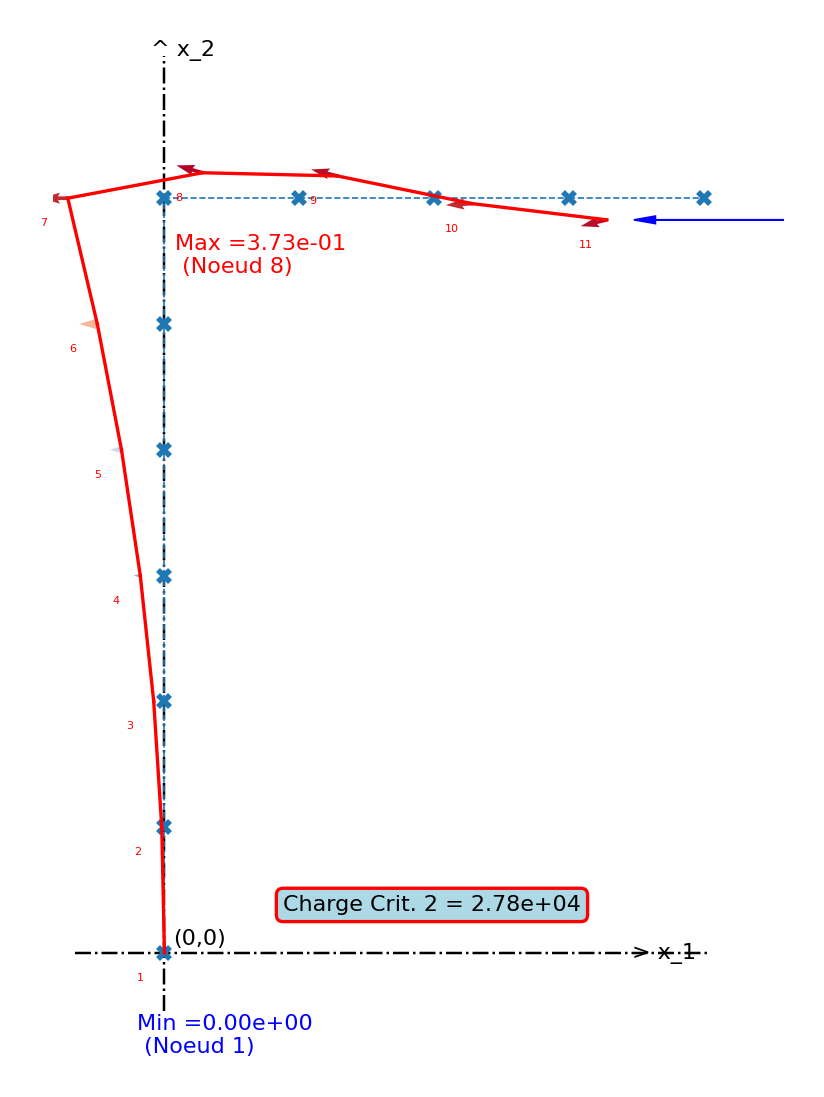

In [10]:
"""
    4/ Calcul des charges de flambage

A son initialisation,la rigidité géométrique n'est pas définie : les efforts normaux sont nuls avant le calcul des pré-contraintes
-> le signe sera défini quand on aura initialisé avec l'état de contrainte calculé par le pb linéarisé
-> le signe de la charge associée calculée changera en conséquence

-> Après le calcul statique, on actualise Kgeom_global
-> A FAIRE : Si Dirichlet non-homogène:
    - retrancher les contributions dues à la pénalité des CL Dirichlet dans K_global et F_tot, 
    - ajouter les efforts correspondants (réactions) dans le vecteur des efforts totaux
 ** IMPORTANT : ** les contributions relatives aux CL Dirichlet ne sont pas modifiées, pas besoin de mettre à jour les CL du pb entier

"""

pb.MAJ_Rigidite_Geom()

charge_min=[]
mode=[]
charge_min0, mode0 = pb.Calcul_Modes_Propres('Flambage', 5)

# Si on veut afficher les qtités associées aux modes propres - définis à une constant près !
# /!\ une fois ces quantités calculées pour affichage, les pré-contraintes deviennent celles associées au mode propre tracé
# pb.Calcul_Def_Eff()
# pb.Affichage('M', '', vp = 1)

# Exemple de mise à jour de propriétés d'éléments
# for ind_elem, elem_temp in enumerate(pb.elem_global):
#     Cl.Modif_Proprietes_Elem(pb, elem_temp.num_elem, ES, EI*1000, Smasse)
# # print(pb.elem_global[0])
# charge_min1, mode1 = pb.Calcul_Modes_Propres('Flambage', 5)

pb.Affichage('X', '', vp = 2)


In [ ]:
charge_min0